In [2]:
import pandas as pd
alll=pd.read_csv('pos_total.csv',index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
alll['SALE_DATE']=alll['SALE_DATE'].apply(lambda x: str(x))
from datetime import datetime, date
alll['SALE_DATE']=alll['SALE_DATE'].apply(lambda x: datetime.strptime(x,'%Y%m%d').date())  
# import calendar
# alll['yoil']=alll['SALE_DATE'].apply(lambda x: calendar.weekday(x.year,x.month,x.day))

KeyboardInterrupt: 

In [4]:
def table(dt):
    dt=dt.groupby(['ITEM_NAME','SALE_DATE']).sum()['SALE_CNT'].unstack().fillna(0)
    dt['sum']=dt.sum(axis=1)
    dt=dt.sort_values('sum',ascending=False)
    return dt
# ex=table(alll[alll['CUSTOMER_NAME']=='범서점'])
ex=table(alll)#2,3,4,5월 sku 37876개 중 sum 상위 20%는 (sku 7575개, 영업일 113일 동안 sum >=1582개 이상)

In [17]:
ex['len']=[114-list(ex.transpose()[i]).count(0) for i in list(ex.transpose().columns)] #len=판매일 수 

In [18]:
ex=ex.sort_values(['len','sum'],ascending=False)

In [34]:
#추세 비슷한게 높게 나왔는가? 피어슨
pearson=pd.DataFrame(ex[(ex['len']==114)&(ex['sum']>200000)]).drop('len',axis=1).transpose().corr().stack()
pearson.index.names=['ITEM_NAME', 'ITEM_NAME2']
pearson=pearson.reset_index()
df=pearson[(0.8<pearson[0])&(pearson[0]!=1)].sort_values(0,ascending=False)
df

In [50]:
ex[ex.index.isin(list(df[df['ITEM_NAME']=='판계란(대란)/30입']['ITEM_NAME2']))].iloc[:,:112].transpose()

ITEM_NAME,재사용종량제봉투20L*1,다이소)1000원균일가,쓰레기봉투가정용20L*1,롯데)월드콘(바닐라)2000,쓰레기봉투가정용10L*1,다이소)2000원균일가,(신)진로참이슬360ML,서울장수생막걸리750ML,애호박(특),사과(특/개),...,롯데빅스크류바1000,서울커피포리백200ML,풀무원SOGA두부(부침/300G),풀무원콩나물(유기농/270G),빙그레비비빅1000_80ML,매일)우유(오리지널)900ML,풀무원목초란(대란)/15입,농심새우깡90G,롯데레쓰비175ML,빙그레바나나우유240ML
SALE_DATE,,,,,,,,,,,,,,,,,,,,,
20200201,27823.0,14091.0,9413.0,3050.0,8725.0,8791.0,9209.0,7165.0,3740.0,2382.0,...,1868.0,2166.0,1807.0,658.0,1382.0,2067.0,1773.0,2445.0,1908.0,2042.0
20200202,25169.0,11181.0,8130.0,2988.0,7994.0,7621.0,6642.0,5456.0,3677.0,2059.0,...,1648.0,1442.0,1697.0,596.0,1396.0,1830.0,1530.0,1991.0,1628.0,1822.0
20200203,26196.0,12854.0,10240.0,1696.0,8916.0,8595.0,6289.0,5855.0,4236.0,2197.0,...,948.0,1955.0,2428.0,754.0,960.0,1846.0,2124.0,1865.0,1647.0,1851.0
20200204,25359.0,11956.0,9301.0,1583.0,7614.0,7829.0,6410.0,5814.0,3667.0,2070.0,...,844.0,1684.0,1817.0,687.0,842.0,1909.0,1706.0,1642.0,1780.0,1754.0
20200205,28544.0,11911.0,9355.0,2203.0,8343.0,7891.0,6716.0,5702.0,8152.0,14998.0,...,904.0,1809.0,3914.0,9027.0,612.0,1861.0,3993.0,1589.0,2044.0,1729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200518,22128.0,9332.0,6662.0,3152.0,6868.0,6338.0,4744.0,6886.0,7281.0,2109.0,...,1307.0,1533.0,1352.0,3924.0,1512.0,1417.0,2089.0,1079.0,1728.0,1251.0
20200519,22571.0,11183.0,7032.0,3020.0,7441.0,7480.0,5012.0,5207.0,7348.0,2272.0,...,1363.0,1619.0,1553.0,4018.0,1175.0,1578.0,2368.0,1217.0,1755.0,1459.0
20200520,22715.0,10822.0,8230.0,3854.0,7563.0,7664.0,4590.0,4795.0,4336.0,2140.0,...,1714.0,1473.0,1275.0,2868.0,1481.0,1466.0,1353.0,1083.0,2055.0,1505.0


In [68]:
#추세 비슷한게 높게 나왔는가? 코사인  
from sklearn.metrics.pairwise import cosine_similarity
cos=pd.DataFrame(pd.DataFrame(cosine_similarity(ex.drop('sum',axis=1)),columns=ex.drop('sum',axis=1).index, index=ex.drop('sum',axis=1).index).stack())  

In [76]:
cos[(0.95<cos[0])&(cos[0]<0.99)].sort_values(0,ascending=False)

0
ITEM_NAME        ITEM_NAME                       
체리(칠레)팩          매일)미니포션(크림치즈)48G        0.987763
매일)미니포션(크림치즈)48G 체리(칠레)팩                 0.987763
                 국산토마토주스980ML            0.986394
기장2KG            매일)미니포션(크림치즈)48G        0.986394
왕꼬마쥐포            매일)미니포션(크림치즈)48G        0.986394
...                                           ...
풀무원콩나물(340G)     풀무원)1등급무항생제신선란(25입/대란)  0.951012
롯데)고소한옥수수모닝롤360G 우정본가)국내산떡국떡1KG          0.950492
우정본가)국내산떡국떡1KG   롯데)고소한옥수수모닝롤360G        0.950492
초L)구운아몬드600G     호두600G                  0.950363
호두600G           초L)구운아몬드600G            0.950363

[100 rows x 1 columns]

In [78]:
ex.reset_index()[ex.reset_index()['ITEM_NAME'].isin(['호두600G','초L)구운아몬드600G'])]   #df[df['id'].isin(['b', 'e', 'k'])]

SALE_DATE,ITEM_NAME,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00,2020-03-06 00:00:00,2020-03-07 00:00:00,2020-03-08 00:00:00,2020-03-09 00:00:00,...,2020-05-14 00:00:00,2020-05-15 00:00:00,2020-05-16 00:00:00,2020-05-17 00:00:00,2020-05-18 00:00:00,2020-05-19 00:00:00,2020-05-20 00:00:00,2020-05-21 00:00:00,2020-05-22 00:00:00,sum
245,초L)구운아몬드600G,16.0,38.0,20.0,34.0,34.0,26.0,30.0,28.0,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1010.0
276,호두600G,14.0,42.0,26.0,30.0,32.0,30.0,26.0,14.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,884.0


In [95]:
import matplotlib as mpl
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams["figure.figsize"] = (14,10)
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
ex[ex.index.isin(list(df[df['ITEM_NAME']=='판계란(대란)/30입']['ITEM_NAME2']))].iloc[:4,:112].transpose().plot()
plt.title('판매량')
plt.show()

NameError: name 'df' is not defined

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


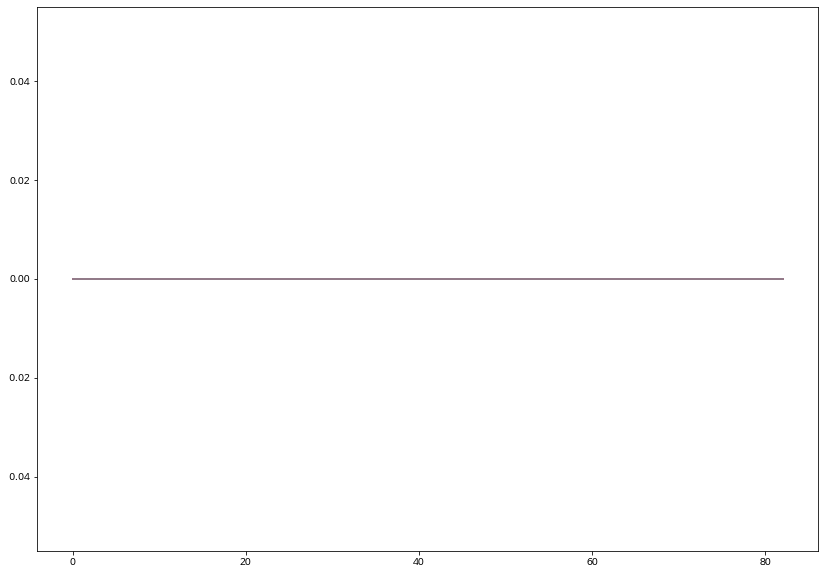

In [124]:
from statsmodels.tsa.arima_model import ARIMA
for i in range(1,1000):
    X=ex.iloc[i:i+1,:].drop('sum',axis=1).values[0]
    model0 = ARIMA(X, dates=None,order=(2,1,0))
    model1 = model0.fit(disp=1)

    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(np.array(X).reshape(len(X),),freq=1)
    ### insert your data seasonality in 'freq'

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
#     plt.plot(trend)
    plt.plot(seasonal) #없음
    plt.plot(residual) #없음
#     plt.plot(X-trend)

In [46]:
summary=ex.transpose().describe().transpose()

KeyboardInterrupt: 

In [98]:
summary[summary['max']>700].drop(['count','min'],axis=1)

,mean,std,25%,50%,75%,max
ITEM_NAME,,,,,,
다다기오이(특),337.047619,1565.772129,0.0,0.0,92.5,14156.0
고산지바나나10CP,272.523810,1236.506198,82.0,127.0,180.5,11446.0
사과(특/개),252.333333,1145.093413,49.5,138.0,182.0,10598.0
애호박(특),233.285714,1057.116954,85.0,106.0,143.5,9798.0
초이스엘))상쾌한아침우유식빵300G,222.428571,1007.547808,97.5,113.0,130.0,9342.0
...,...,...,...,...,...,...
신고배(특)EA,16.952381,77.380908,0.0,5.0,16.0,712.0
CJ안심부산어묵얇은사각200G*2,16.809524,76.289947,4.0,8.0,12.0,706.0
(친환경)어린잎(2팩기획),16.761905,76.554039,0.0,7.0,12.0,704.0


In [108]:
import numpy as np
XX=np.array([ex.iloc[276:277,:].drop('sum',axis=1).values[0],ex.iloc[245:246,:].drop('sum',axis=1).values[0],ex.iloc[6:7,:].drop('sum',axis=1).values[0]])
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(XX)
distances, indices = nbrs.kneighbors(XX)
distances

array([[  0.        ,  54.58937626],
       [  0.        ,  54.58937626],
       [  0.        , 963.79873418]])

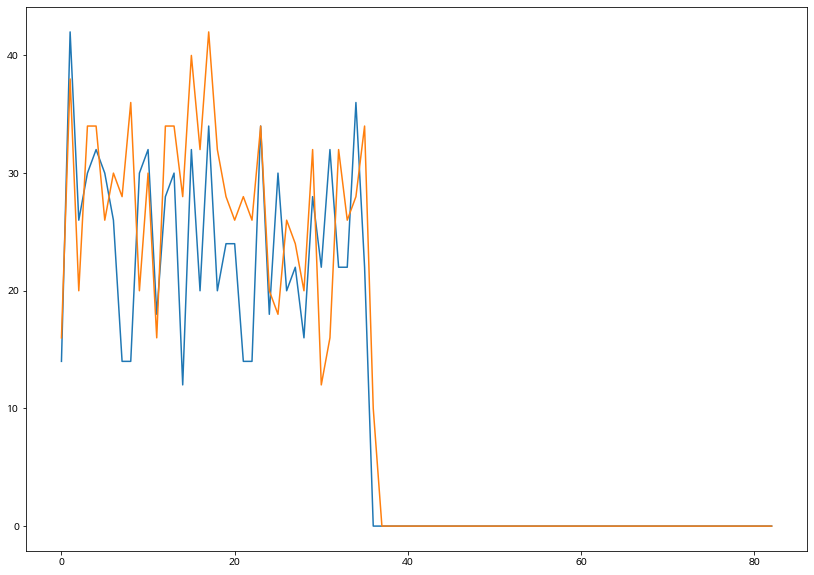

In [109]:
plt.plot(ex.iloc[276:277,:].drop('sum',axis=1).values[0])
plt.plot(ex.iloc[245:246,:].drop('sum',axis=1).values[0])

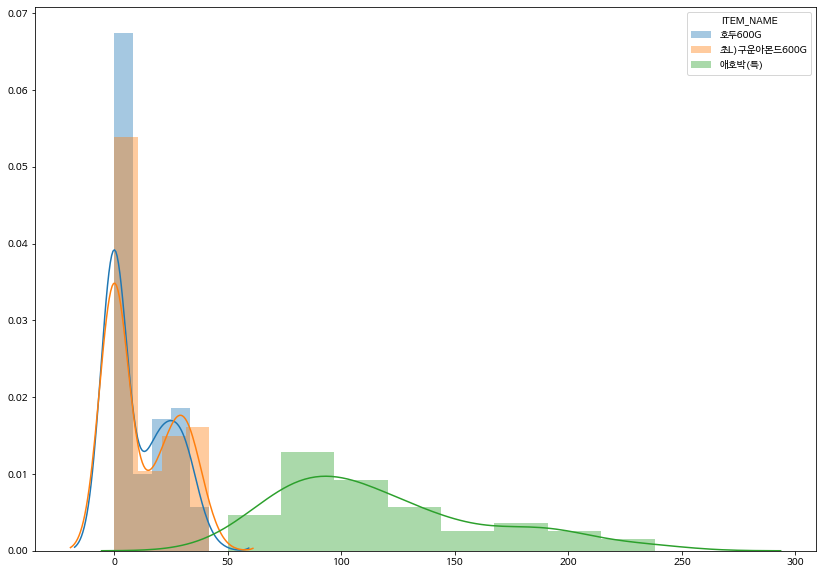

In [139]:
import seaborn as sns

sns.distplot(ex.iloc[276:277,:].drop('sum',axis=1).values[0],  label=ex.iloc[276:277,:].index)
sns.distplot(ex.iloc[245:246,:].drop('sum',axis=1).values[0],  label=ex.iloc[245:246,:].index)
sns.distplot(ex.iloc[3:4,:].drop('sum',axis=1).values[0],  label=ex.iloc[3:4,:].index)

plt.legend(title="ITEM_NAME")
plt.show()

In [16]:
sample=table(alll[alll['ITEM_NAME']=='롯데)월드콘(바닐라)2000']).transpose().reset_index().drop(112)

In [17]:
import datetime
sample['SALE_DATE']=sample['SALE_DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y%m%d').date())

In [18]:
import calendar
sample['yoil']=sample['SALE_DATE'].apply(lambda x: calendar.weekday(x.year,x.month,x.day))

### import matplotlib as mpl
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4)
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

import seaborn as sns
sns.distplot(sample[sample['yoil']==0]['SALE_CNT'].values,  label='월')
sns.distplot(sample[sample['yoil']==1]['SALE_CNT'].values,  label='화')
sns.distplot(sample[sample['yoil']==2]['SALE_CNT'].values,  label='수')
sns.distplot(sample[sample['yoil']==3]['SALE_CNT'].values,  label='목')
sns.distplot(sample[sample['yoil']==4]['SALE_CNT'].values,  label='금')
sns.distplot(sample[sample['yoil']==5]['SALE_CNT'].values,  label='토')
sns.distplot(sample[sample['yoil']==6]['SALE_CNT'].values,  label='일')

plt.legend(title="ITEM_NAME")
plt.show()

In [105]:
mean=[]
for i in range(14):
    mean.extend([75.28571429,
       61.85714286,
       65.6       ,
       61.8       ,
       58.69230769,
    75.5       ,
       69.92857143])

In [95]:
median=[]
for i in range(99):
    median.extend([64])

In [22]:
sample=alll[(alll['CUSTOMER_NAME']=='범서점')&(alll['ITEM_NAME']=='판계란(대란)/30입')]

In [23]:
sample=pd.DataFrame(sample.groupby('SALE_DATE').sum()['SALE_CNT']).reset_index()

In [25]:
import datetime
sample['SALE_DATE']=sample['SALE_DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y%m%d').date())
import calendar
sample['yoil']=sample['SALE_DATE'].apply(lambda x: calendar.weekday(x.year,x.month,x.day))

In [127]:
sample['SALE_CNT'].describe()

count     99.000000
mean      66.969697
std       28.889110
min        2.000000
25%       50.000000
50%       64.000000
75%       72.500000
max      209.000000
Name: SALE_CNT, dtype: float64

In [116]:
import xgboost as xgb
X, y = sample['SALE_DATE'],sample['SALE_CNT'] 
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (6186,))

In [ ]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy,early_stopping_rounds=200,eval_set=[(trainX,trainy)])
	#model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, 1], predictions)
	return error, test[:, 1], predictions


values = sample['SALE_CNT'].values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=3)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

[0]	validation_0-rmse:55.72372
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:43.32228
[2]	validation_0-rmse:34.49096
[3]	validation_0-rmse:28.02389
[4]	validation_0-rmse:22.58570
[5]	validation_0-rmse:18.54582
[6]	validation_0-rmse:15.50770
[7]	validation_0-rmse:13.12826
[8]	validation_0-rmse:11.21821
[9]	validation_0-rmse:9.63465
[10]	validation_0-rmse:8.31408
[11]	validation_0-rmse:7.21284
[12]	validation_0-rmse:6.30207
[13]	validation_0-rmse:5.57212
[14]	validation_0-rmse:4.96467
[15]	validation_0-rmse:4.39553
[16]	validation_0-rmse:3.77155
[17]	validation_0-rmse:3.43730
[18]	validation_0-rmse:3.17881
[19]	validation_0-rmse:2.86821
[20]	validation_0-rmse:2.61756
[21]	validation_0-rmse:2.44969
[22]	validation_0-rmse:2.21579
[23]	validation_0-rmse:2.09451
[24]	validation_0-rmse:1.97608
[25]	validation_0-rmse:1.65746
[26]	validation_0-rmse:1.42675
[27]	validation_0-rmse:1.25289
[28]	validation_0-rmse:1.16527
[29]	validation_0-rmse:1.09834
[30]	

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:97: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


[78]	validation_0-rmse:0.02801
[79]	validation_0-rmse:0.02603
[80]	validation_0-rmse:0.02479
[81]	validation_0-rmse:0.02275
[82]	validation_0-rmse:0.02135
[83]	validation_0-rmse:0.01921
[84]	validation_0-rmse:0.01841
[85]	validation_0-rmse:0.01783
[86]	validation_0-rmse:0.01597
[87]	validation_0-rmse:0.01547
[88]	validation_0-rmse:0.01497
[89]	validation_0-rmse:0.01470
[90]	validation_0-rmse:0.01452
[91]	validation_0-rmse:0.01365
[92]	validation_0-rmse:0.01247
[93]	validation_0-rmse:0.01142
[94]	validation_0-rmse:0.01066
[95]	validation_0-rmse:0.00987
[96]	validation_0-rmse:0.00860
[97]	validation_0-rmse:0.00782
[98]	validation_0-rmse:0.00762
[99]	validation_0-rmse:0.00654
[100]	validation_0-rmse:0.00601
[101]	validation_0-rmse:0.00524
[102]	validation_0-rmse:0.00510
[103]	validation_0-rmse:0.00465
[104]	validation_0-rmse:0.00421
[105]	validation_0-rmse:0.00379
[106]	validation_0-rmse:0.00345
[107]	validation_0-rmse:0.00331
[108]	validation_0-rmse:0.00315
[109]	validation_0-rmse:0.0030

In [207]:
from xgboost import plot_importance 
def plot_features(booster, figsize): 
    fig, ax = plt.subplots(1,1,figsize=figsize) 
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

NameError: name 'plot_features' is not defined

In [9]:
data=pd.read_csv('천안input.csv',index_col=0)
data

,timestamp,target_value,dayofweek_mean,dayofweek_median,temperature,rainfall,holiday,before_holiday,after_holiday,gate,proportion,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed
0,2019-01-01,107,313,319,0.6,0.0,1,0,0,94,1.138298,0,0,0,0,0,1,0
1,2019-01-02,306,307,317,1.2,0.0,0,0,1,219,1.397260,0,0,0,0,0,0,1
2,2019-01-03,299,309,317,3.0,0.0,0,0,0,229,1.305677,0,0,0,0,1,0,0
3,2019-01-04,308,284,301,4.4,0.0,0,0,0,211,1.459716,1,0,0,0,0,0,0
4,2019-01-05,56,64,59,1.9,0.0,0,0,0,48,1.166667,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2020-10-27,285,313,319,19.8,0.0,0,0,0,226,1.261062,0,0,0,0,0,1,0
666,2020-10-28,280,307,317,19.0,0.0,0,0,0,229,1.222707,0,0,0,0,0,0,1
667,2020-10-29,315,309,317,16.7,0.0,0,0,0,216,1.458333,0,0,0,0,1,0,0
668,2020-10-30,187,284,301,18.4,0.0,0,0,0,140,1.335714,1,0,0,0,0,0,0


In [4]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data=pd.read_csv('천안input.csv',index=False)

X = pd.DataFrame(data[['dayofweek_mean','dayofweek_median', 'temperature', 'rainfall', 'holiday','before_holiday', 'after_holiday', 'gate', 'proportion', 'weekday_Fri','weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur','weekday_Tue', 'weekday_Wed']], columns={'dayofweek_mean','dayofweek_median', 'temperature', 'rainfall', 'holiday',
       'before_holiday', 'after_holiday', 'gate', 'proportion', 'weekday_Fri','weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur','weekday_Tue', 'weekday_Wed'})
y = pd.Series(data['target_value'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = xgb.XGBRegressor(
    n_estimators=500,
    reg_lambda=0.1,
    gamma=0,
    max_depth=5
)
evals=[(X_test,y_test)]
regressor.fit(X_train, y_train,early_stopping_rounds=200,eval_set=evals)
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns={'dayofweek_mean','dayofweek_median', 'temperature', 'rainfall', 'holiday',
       'before_holiday', 'after_holiday', 'gate', 'proportion', 'weekday_Fri','weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur','weekday_Tue', 'weekday_Wed'})
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

[0]	validation_0-rmse:184.59415
[1]	validation_0-rmse:129.79121
[2]	validation_0-rmse:91.73949
[3]	validation_0-rmse:65.12563
[4]	validation_0-rmse:46.52317
[5]	validation_0-rmse:33.53976
[6]	validation_0-rmse:24.75791
[7]	validation_0-rmse:18.68980
[8]	validation_0-rmse:14.74235
[9]	validation_0-rmse:12.25785
[10]	validation_0-rmse:10.74764
[11]	validation_0-rmse:9.82578
[12]	validation_0-rmse:9.31700
[13]	validation_0-rmse:9.02595
[14]	validation_0-rmse:8.80503
[15]	validation_0-rmse:8.69277
[16]	validation_0-rmse:8.58246
[17]	validation_0-rmse:8.53617
[18]	validation_0-rmse:8.47228
[19]	validation_0-rmse:8.45920
[20]	validation_0-rmse:8.43885
[21]	validation_0-rmse:8.42168
[22]	validation_0-rmse:8.39769
[23]	validation_0-rmse:8.39691
[24]	validation_0-rmse:8.39200
[25]	validation_0-rmse:8.39277
[26]	validation_0-rmse:8.39174
[27]	validation_0-rmse:8.39543
[28]	validation_0-rmse:8.39801
[29]	validation_0-rmse:8.39925
[30]	validation_0-rmse:8.39862
[31]	validation_0-rmse:8.39435
[32]	

68.661215213373

In [123]:
sample

,index,SALE_DATE,SALE_CNT,yoil,closed,before_closed
0,0,2020-02-01,39,5,0,0
1,1,2020-02-02,61,6,0,0
2,2,2020-02-03,72,0,0,0
3,3,2020-02-04,68,1,0,0
4,4,2020-02-05,134,2,0,0
...,...,...,...,...,...,...
94,94,2020-05-10,68,6,1,0
95,95,2020-05-11,70,0,0,0
96,96,2020-05-12,52,1,0,0
97,97,2020-05-13,45,2,0,0


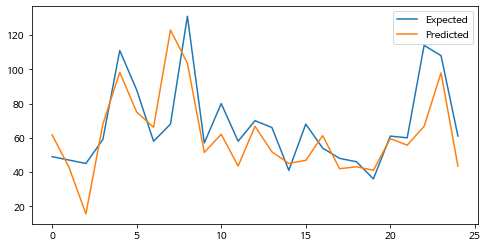

In [186]:
from matplotlib import pyplot
plt.rcParams["figure.figsize"] = (8,4)
pyplot.plot(y_test.values, label='Expected')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [82]:
from datetime import timedelta
closed=[i for i in sample[sample['closed']==1]['SALE_DATE']]
def before_closed(sample):
    if sample['closed']==1:
        return 0
    elif sample['SALE_DATE']+timedelta(days=1) in closed:
        return 1
    else:
        return 0    
sample['before_closed']=sample.apply(before_closed,axis=1)

In [96]:
sample

,SALE_DATE,SALE_CNT,yoil,closed,before_closed
0,2020-02-01,39,5,0,0
1,2020-02-02,61,6,0,0
2,2020-02-03,72,0,0,0
3,2020-02-04,68,1,0,0
4,2020-02-05,134,2,0,0
...,...,...,...,...,...
94,2020-05-10,68,6,1,0
95,2020-05-11,70,0,0,0
96,2020-05-12,52,1,0,0
97,2020-05-13,45,2,0,0


In [94]:
alll[(alll['CUSTOMER_NAME']=='범서점')&(alll['ITEM_NAME']=='판계란(대란)/30입')].groupby('SALE_HOUR').sum()

,SALE_CNT
SALE_HOUR,
9,72
10,244
11,330
12,348
13,402
14,435
15,591
16,737
17,721


In [130]:
sample_time=alll[(alll['CUSTOMER_NAME']=='범서점')&(alll['ITEM_NAME']=='판계란(대란)/30입')].groupby(['SALE_DATE','SALE_HOUR']).sum().reset_index()

In [135]:
sample_time['time']=sample_time['SALE_DATE']+sample_time['SALE_HOUR']

In [134]:
sample_time['SALE_HOUR']=sample_time['SALE_HOUR'].apply(lambda x: str(x))

In [139]:
sample_time=sample_time.set_index('time')

In [146]:
sample_time=sample_time.reset_index().drop(['time'],axis=1)

In [143]:
import datetime
sample_time['SALE_DATE']=sample_time['SALE_DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y%m%d').date())

In [151]:
sample_time=pd.merge(sample_time,sample,on='SALE_DATE').drop(['SALE_DATE', 'index','SALE_CNT_y','yoil'],axis=1)

In [188]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = pd.DataFrame(sample_time[['SALE_HOUR','closed', 'before_closed']], columns={ 'SALE_HOUR','closed', 'before_closed'})
y = pd.Series(sample_time['SALE_CNT_x'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y)
regressor = xgb.XGBRegressor(
    n_estimators=600,
    reg_lambda=1,
    gamma=0,
    max_depth=5
)
evals=[(X_test,y_test)]
regressor.fit(X_train, y_train,early_stopping_rounds=200,eval_set=evals)
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns={'SALE_HOUR',  'closed', 'before_closed'})
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

[0]	validation_0-rmse:4.63811
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:3.94130
[2]	validation_0-rmse:3.58897
[3]	validation_0-rmse:3.42649
[4]	validation_0-rmse:3.36312
[5]	validation_0-rmse:3.34275
[6]	validation_0-rmse:3.34287
[7]	validation_0-rmse:3.35981
[8]	validation_0-rmse:3.37662
[9]	validation_0-rmse:3.40218
[10]	validation_0-rmse:3.42680
[11]	validation_0-rmse:3.43319
[12]	validation_0-rmse:3.43868
[13]	validation_0-rmse:3.45828
[14]	validation_0-rmse:3.47869
[15]	validation_0-rmse:3.49080
[16]	validation_0-rmse:3.50570
[17]	validation_0-rmse:3.51860
[18]	validation_0-rmse:3.52021
[19]	validation_0-rmse:3.52895
[20]	validation_0-rmse:3.53744
[21]	validation_0-rmse:3.54616
[22]	validation_0-rmse:3.54675
[23]	validation_0-rmse:3.54784
[24]	validation_0-rmse:3.55402
[25]	validation_0-rmse:3.55954
[26]	validation_0-rmse:3.56361
[27]	validation_0-rmse:3.56852
[28]	validation_0-rmse:3.57249
[29]	validation_0-rmse:3.57587
[30]	validatio

11.173993549562292